<a href="https://colab.research.google.com/github/AbdulrahmanAhmed123/Acceidant-RoadAnalyst/blob/main/Root_cause_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
import missingno as msno

In [ ]:
data = pd.read_csv('Road Accident Data_sample_30.csv')

In [ ]:
type(data.columns)

pandas.core.indexes.base.Index

In [ ]:
data.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [ ]:
data.columns.tolist()

['Accident_Index',
 'Accident Date',
 'Day_of_Week',
 'Junction_Control',
 'Junction_Detail',
 'Accident_Severity',
 'Latitude',
 'Light_Conditions',
 'Local_Authority_(District)',
 'Carriageway_Hazards',
 'Longitude',
 'Number_of_Casualties',
 'Number_of_Vehicles',
 'Police_Force',
 'Road_Surface_Conditions',
 'Road_Type',
 'Speed_limit',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Vehicle_Type']

In [ ]:
data.drop(columns ="Accident_Index",inplace =True)

In [ ]:
data

,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,6/26/2021,Friday,Give way or uncontrolled,T or staggered junction,Slight,51.490333,Daylight,Southwark,NaN,-0.054992,2,2,Metropolitan Police,Dry,Single carriageway,30,11:30,Urban,Fine no high winds,Car
1,9/1/2022,Wednesday,Give way or uncontrolled,Slip road,Slight,51.878849,Daylight,Colchester,NaN,0.780218,1,2,Essex,Dry,Dual carriageway,40,8:40,Rural,Fine no high winds,Car
2,1/15/2022,Friday,Data missing or out of range,Not at junction or within 20 metres,Slight,53.777127,Daylight,Leeds,NaN,-1.558689,1,1,West Yorkshire,Wet or damp,Single carriageway,30,9:05,Urban,Raining no high winds,Van / Goods 3.5 tonnes mgw or under
3,1/6/2022,Wednesday,Data missing or out of range,Not at junction or within 20 metres,Slight,52.306265,Darkness - no lighting,Huntingdonshire,NaN,-0.075312,1,3,Cambridgeshire,Snow,Single carriageway,60,18:25,Rural,Snowing no high winds,Car
4,11/15/2022,Monday,Give way or uncontrolled,T or staggered junction,Slight,51.880617,Daylight,Colchester,NaN,0.911552,1,1,Essex,Dry,Single carriageway,30,15:30,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102652,2/24/2021,Tuesday,Auto traffic signal,Roundabout,Slight,52.601229,Daylight,Blaby,NaN,-1.194381,4,4,Leicestershire,Dry,Slip road,70,16:40,Rural,Fine no high winds,Car
102653,12/17/2021,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.594849,Darkness - lights lit,Barnet,NaN,-0.250498,1,2,Metropolitan Police,Wet or damp,Single carriageway,30,18:35,Urban,Raining no high winds,Car
102654,3/4/2021,Wednesday,Not at junction or within 20 metres,Not at junction or within 20 metres,Slight,51.714766,Darkness - lights lit,Stroud,NaN,-2.301763,2,1,Gloucestershire,Wet or damp,Single carriageway,30,22:15,Rural,Raining no high winds,Car
102655,7/15/2021,Wednesday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.441262,Daylight,Dartford,NaN,0.235759,1,2,Kent,Dry,Single carriageway,50,17:40,Urban,Fine no high winds,Car


In [ ]:
data["Accident Date"].value_counts()

,count
Accident Date,
2/11/2021,250
12/4/2021,234
10/6/2021,229
11/13/2021,227
11/12/2021,221
...,...
12/31/2022,61
12/25/2021,59
12/27/2022,55


In [ ]:
data["Accident Date"] = pd.to_datetime(data["Accident Date"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102657 entries, 0 to 102656
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident Date               102657 non-null  datetime64[ns]
 1   Day_of_Week                 102657 non-null  object        
 2   Junction_Control            102657 non-null  object        
 3   Junction_Detail             102657 non-null  object        
 4   Accident_Severity           102657 non-null  object        
 5   Latitude                    102657 non-null  float64       
 6   Light_Conditions            102657 non-null  object        
 7   Local_Authority_(District)  102657 non-null  object        
 8   Carriageway_Hazards         1772 non-null    object        
 9   Longitude                   102657 non-null  float64       
 10  Number_of_Casualties        102657 non-null  int64         
 11  Number_of_Vehicles          102657 non-

In [ ]:
data.isnull()

,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102652,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
102653,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
102654,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
102655,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
Accident Date,0
Day_of_Week,0
Junction_Control,0
Junction_Detail,0
Accident_Severity,0
Latitude,0
Light_Conditions,0
Local_Authority_(District),0
Carriageway_Hazards,100885
Longitude,0


In [ ]:
null_sums = data.isnull().sum()
for column, null_count in null_sums.items():
    if null_count > 0:
        print(f"{column}: {null_count}")

Carriageway_Hazards: 100885
Road_Surface_Conditions: 107
Road_Type: 494
Time: 3
Weather_Conditions: 2017


In [ ]:
# data.drop(columns = ["Carriageway_Hazards"],inplace =True


In [ ]:
drop_columns = ['Carriageway_Hazards','Time','Police_Force']
data.drop(drop_columns, axis=1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102657 entries, 0 to 102656
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident Date               102657 non-null  datetime64[ns]
 1   Day_of_Week                 102657 non-null  object        
 2   Junction_Control            102657 non-null  object        
 3   Junction_Detail             102657 non-null  object        
 4   Accident_Severity           102657 non-null  object        
 5   Latitude                    102657 non-null  float64       
 6   Light_Conditions            102657 non-null  object        
 7   Local_Authority_(District)  102657 non-null  object        
 8   Longitude                   102657 non-null  float64       
 9   Number_of_Casualties        102657 non-null  int64         
 10  Number_of_Vehicles          102657 non-null  int64         
 11  Road_Surface_Conditions     102550 non-

In [ ]:
data.shape

(102657, 17)

In [ ]:
data[['Road_Surface_Conditions','Road_Type','Weather_Conditions']].describe()

,Road_Surface_Conditions,Road_Type,Weather_Conditions
count,102550,102163,100640
unique,5,5,8
top,Dry,Single carriageway,Fine no high winds
freq,69911,76891,81610


In [ ]:
# #explain more
# def fill_based_on_conditions(row):
#     if pd.isnull(row['Weather_Conditions']):
#         return [row['Road_Surface_Conditions']]
# data['Road_Surface_Conditions'] = data.apply(fill_based_on_conditions, axis=1)
# # data.isnull().sum()

In [ ]:
# print(data.ndim)
# print((data["Accident Date"]).mean())
# print(data["Road_Surface_Conditions"])
print((data["Speed_limit"]).max() -(data["Speed_limit"]).min())
print((data["Speed_limit"]).max() ,(data["Speed_limit"]).min())

50
70 20


In [ ]:
data['Road_Surface_Conditions'].unique()

array(['Dry', 'Wet or damp', 'Snow', 'Frost or ice', nan,
       'Flood over 3cm. deep'], dtype=object)

In [ ]:
list_index=data.loc[data['Road_Surface_Conditions'].isnull(), ['Road_Surface_Conditions']].index
for index in list_index:
  if (data.iloc[index,11]=="nan"):
    data.drop(index,inplace=True)
  else:
    if (data.iloc[index,15]=="Fine no high winds"):
      data.iloc[index,11]="Dry"
    elif (data.iloc[index,15]=="Raining no high winds"):
      data.iloc[index,11]="Wet or damp"
    elif (data.iloc[index,15]=="Snowing no high winds"):
      data.iloc[index,11]="Snow"
    elif (data.iloc[index,15]=="Raining + high winds"):
      data.iloc[index,11]="Frost or ice"
    elif (data.iloc[index,15]=="Other"):
      data.iloc[index,11]="Flood over 3cm. deep"
    elif (data.iloc[index,15]=="Fog or mist"):
      data.iloc[index,11]="Wet or damp"
    elif (data.iloc[index,15]=="Fine + high winds"):
      data.iloc[index,11]="Dry"
    elif (data.iloc[index,15]=="Snowing + high winds"):
      data.iloc[index,11]="Snow"
    else:
      data.iloc[index,11]="Other"


In [ ]:
list_index=data.loc[data['Weather_Conditions'].isnull(), ['Weather_Conditions']].index
for index in list_index:
  if (data.iloc[index,15]=="nan"):
    data.drop(index,inplace=True)
  else:
    if (data.iloc[index,11]=="Dry"):
      data.iloc[index,15]="Fine no high winds"
    elif (data.iloc[index,11]=="Wet or damp"):
      data.iloc[index,15]="Raining no high winds"
    elif (data.iloc[index,11]=="Snow"):
      data.iloc[index,15]="Snowing no high winds"
    elif (data.iloc[index,11]=="Frost or ice"):
      data.iloc[index,15]="Raining + high winds"
    elif (data.iloc[index,11]=="Flood over 3cm. deep"):
      data.iloc[index,15]="Other"
    elif (data.iloc[index,11]=="Wet or damp"):
      data.iloc[index,15]="Fog or mist"
    elif (data.iloc[index,11]=="Dry"):
      data.iloc[index,15]="Fine + high winds"
    elif (data.iloc[index,11]=="Snow"):
      data.iloc[index,15]="Snowing + high winds"
    else:
      data.iloc[index,15]="Other"

In [ ]:
data.isnull().sum()

,0
Accident Date,0
Day_of_Week,0
Junction_Control,0
Junction_Detail,0
Accident_Severity,0
Latitude,0
Light_Conditions,0
Local_Authority_(District),0
Longitude,0
Number_of_Casualties,0


In [ ]:
data['Road_Type'].isnull().sum()

np.int64(494)

In [ ]:
data[data['Local_Authority_(District)'] == 'Southwark']

,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,2021-06-26,Friday,Give way or uncontrolled,T or staggered junction,Slight,51.490333,Daylight,Southwark,-0.054992,2,2,Dry,Single carriageway,30,Urban,Fine no high winds,Car
14,2021-06-11,Thursday,Give way or uncontrolled,T or staggered junction,Slight,51.499976,Daylight,Southwark,-0.072592,1,2,Dry,Single carriageway,30,Urban,Fine no high winds,Car
90,2021-11-23,Monday,Give way or uncontrolled,T or staggered junction,Slight,51.506592,Daylight,Southwark,-0.103295,1,1,Wet or damp,Single carriageway,30,Urban,Raining no high winds,Car
335,2022-01-29,Friday,Auto traffic signal,T or staggered junction,Slight,51.506171,Darkness - lights lit,Southwark,-0.088470,1,2,Dry,Single carriageway,30,Urban,Fine no high winds,Car
943,2021-05-23,Saturday,Give way or uncontrolled,Mini-roundabout,Slight,51.471063,Daylight,Southwark,-0.064308,1,2,Dry,Roundabout,30,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101769,2022-11-15,Monday,Data missing or out of range,Not at junction or within 20 metres,Serious,51.503432,Darkness - lights lit,Southwark,-0.091467,1,1,Dry,Single carriageway,30,Urban,Fine no high winds,Car
101827,2022-02-04,Thursday,Data missing or out of range,Not at junction or within 20 metres,Serious,51.473789,Daylight,Southwark,-0.066064,4,2,Dry,Single carriageway,30,Urban,Fine no high winds,Motorcycle 125cc and under
102288,2021-10-31,Saturday,Give way or uncontrolled,T or staggered junction,Slight,51.474036,Daylight,Southwark,-0.092118,1,2,Dry,Single carriageway,30,Urban,Fine no high winds,Motorcycle 125cc and under
102320,2022-07-31,Saturday,Auto traffic signal,Crossroads,Slight,51.477365,Daylight,Southwark,-0.070233,4,2,Dry,Single carriageway,30,Urban,Fine no high winds,Car


In [ ]:
data['Local_Authority_(District)'].unique()

array(['Southwark', 'Colchester', 'Leeds', 'Huntingdonshire',
       'Nottingham', 'New Forest', 'Birmingham', 'Hart', 'Eastbourne',
       'Newport', 'Kirklees', 'Wyre', 'Wokingham', 'Warrington', 'Swale',
       'Enfield', 'North Lincolnshire', 'Waltham Forest', 'Hillingdon',
       'Westminster', 'Sunderland', 'North East Lincolnshire', 'Slough',
       'Powys', 'Cheshire West and Chester',
       'Kingston upon Hull, City of', 'Peterborough', 'Elmbridge',
       'East Northamptonshire', 'South Somerset',
       "King's Lynn and West Norfolk", 'Harrogate',
       'East Riding of Yorkshire', 'Preston', 'Tameside', 'Barnet',
       'Dacorum', 'Torbay', 'South Tyneside', 'Maidstone', 'Poole',
       'Uttlesford', 'Sefton', 'Stoke-on-Trent', 'Lincoln',
       'Reigate and Banstead', 'Darlington', 'High Peak', 'Bradford',
       'Liverpool', 'Fenland', 'Croydon', 'Doncaster', 'Trafford',
       'Newark and Sherwood', 'South Ribble', 'Carmarthenshire', 'Derby',
       'Gravesham', 'Manche

In [ ]:
data['Road_Type'].unique()

array(['Single carriageway', 'Dual carriageway', 'One way street',
       'Roundabout', nan, 'Slip road'], dtype=object)

In [ ]:
data['Accident_Severity'].unique()

array(['Slight', 'Serious', 'Fatal', 'Fetal'], dtype=object)

In [ ]:
data.loc[data['Accident_Severity'] == 'Fetal', 'Accident_Severity'] = 'Fatal'

In [ ]:
data['Road_Type'].value_counts()

,count
Road_Type,
Single carriageway,76891
Dual carriageway,15080
Roundabout,7021
One way street,2082
Slip road,1089


<Axes: >

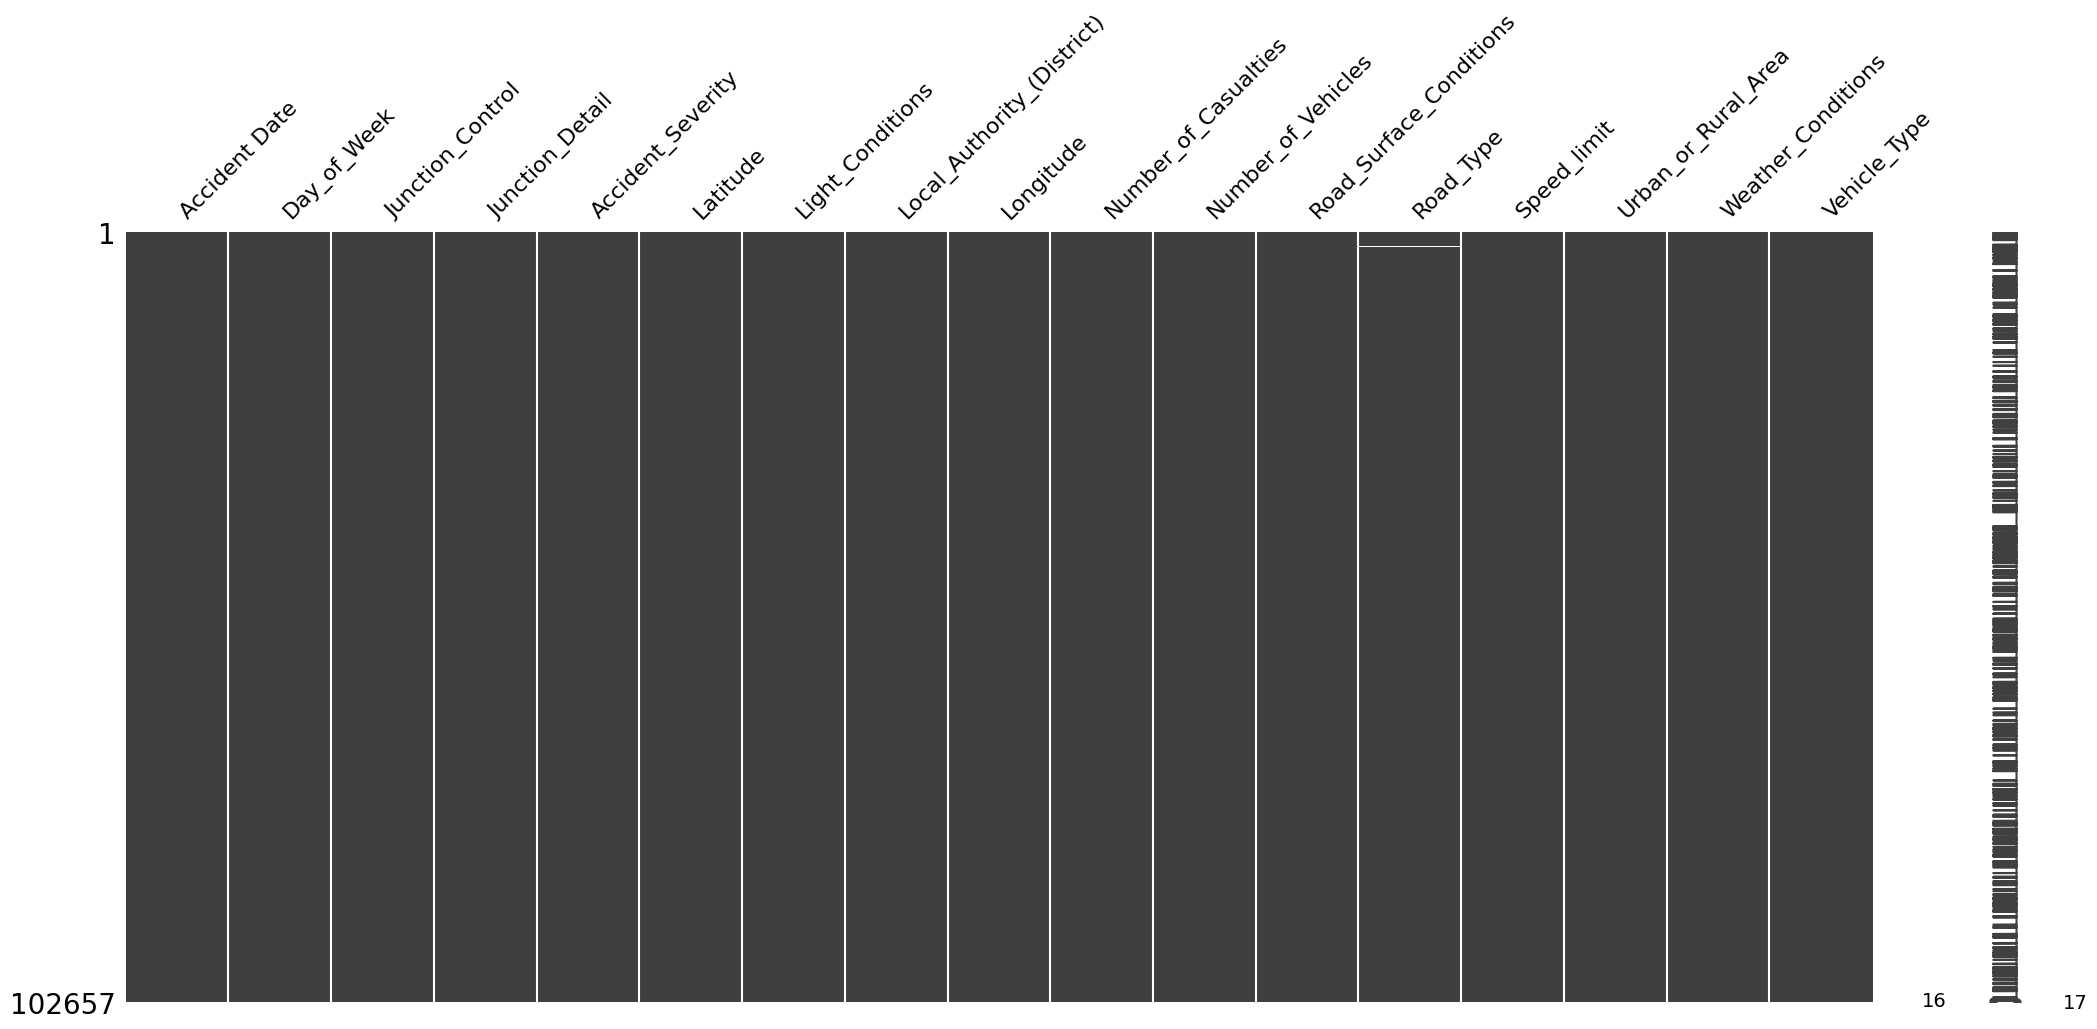

In [ ]:
msno.matrix(data)

In [ ]:
data['Road_Type'].ffill(limit= 1, inplace=True)


<ipython-input-33-101c90baae37>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Road_Type'].ffill(limit= 1, inplace=True)


<Axes: >

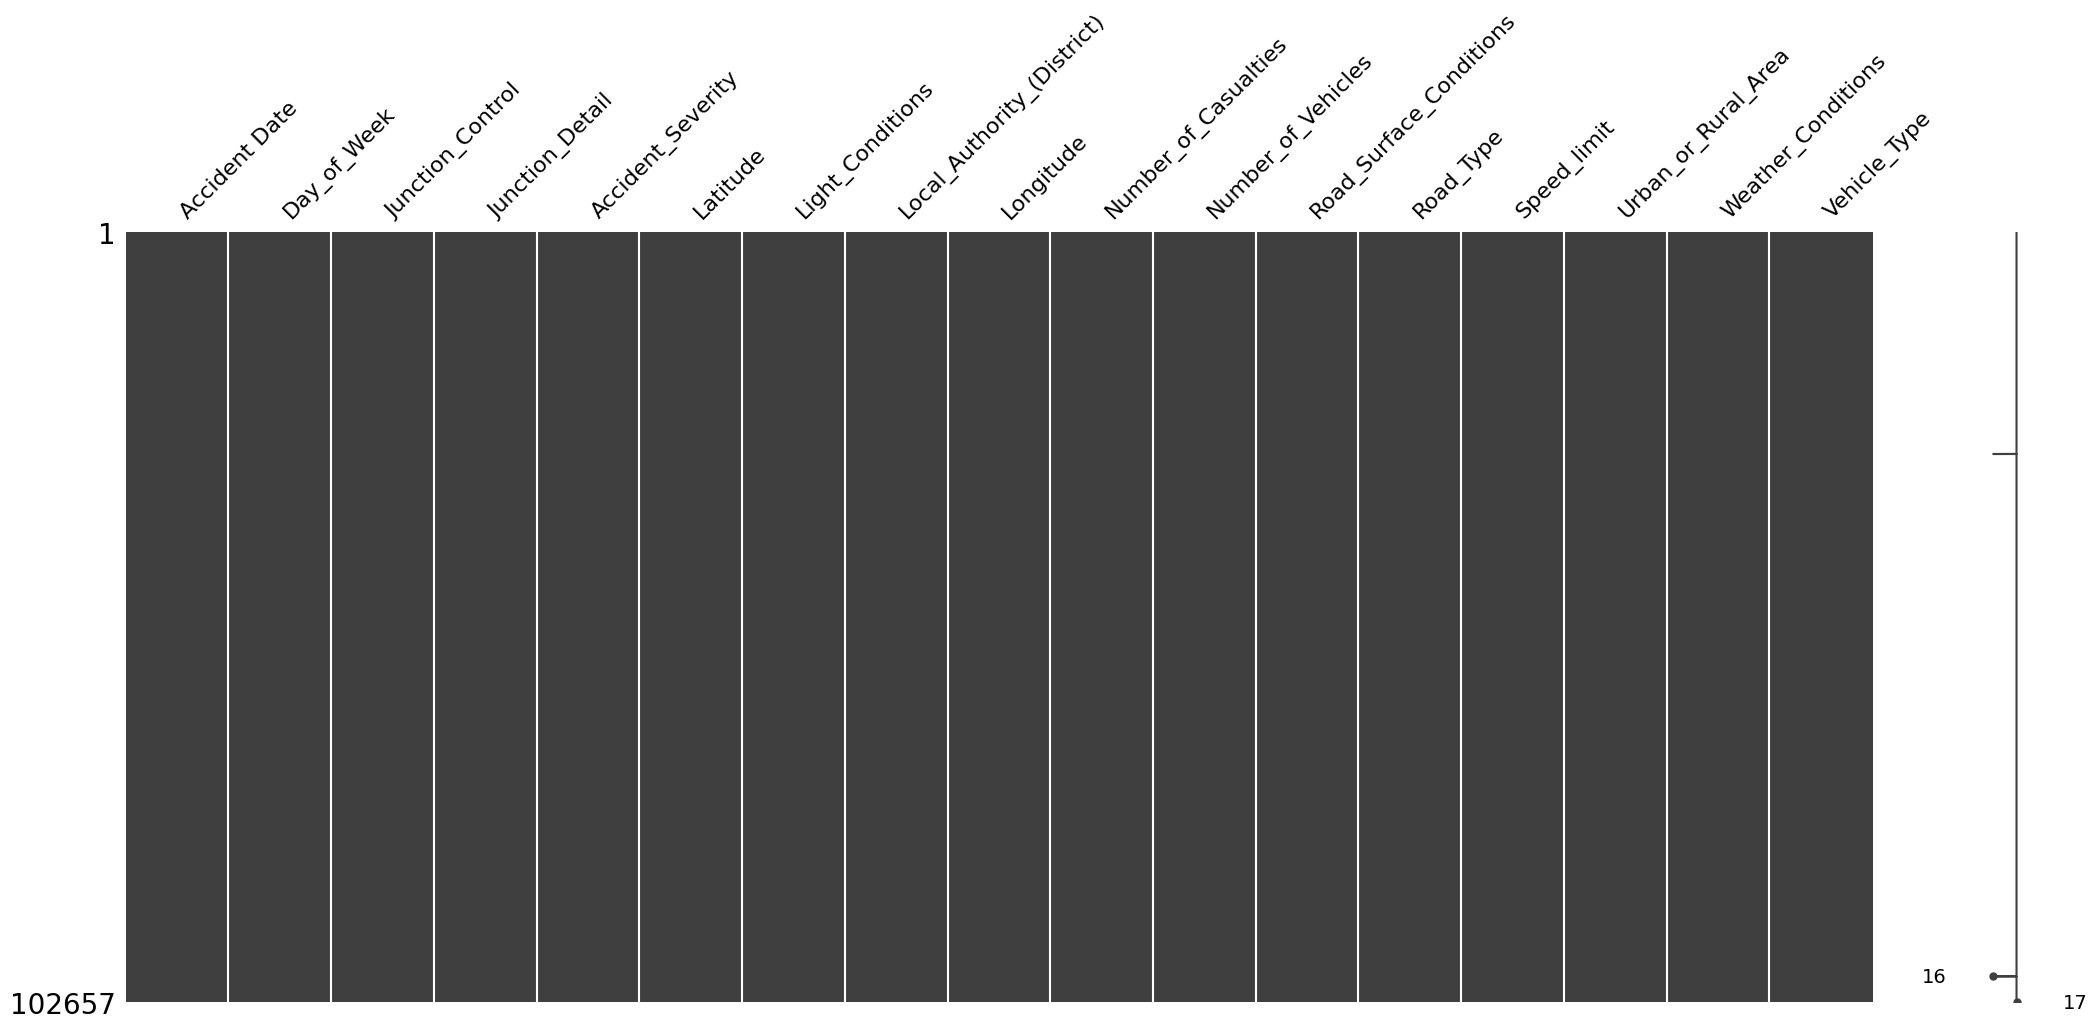

In [ ]:
msno.matrix(data)

In [ ]:
data.isnull().sum()

,0
Accident Date,0
Day_of_Week,0
Junction_Control,0
Junction_Detail,0
Accident_Severity,0
Latitude,0
Light_Conditions,0
Local_Authority_(District),0
Longitude,0
Number_of_Casualties,0


In [ ]:
data['Accident_Severity'].unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

In [ ]:
data.to_csv('Road Accident Data_cleaning.csv', index = False)

In [ ]:
df= pd.read_csv('Road Accident Data_cleaning.csv')

In [ ]:
df.shape

(102657, 17)

In [ ]:
df.loc[df['Number_of_Vehicles'].max()]

,32
Accident Date,2022-09-12
Day_of_Week,Sunday
Junction_Control,Give way or uncontrolled
Junction_Detail,Private drive or entrance
Accident_Severity,Slight
Latitude,50.962231
Light_Conditions,Daylight
Local_Authority_(District),South Somerset
Longitude,-2.653849
Number_of_Casualties,2


In [ ]:
condition = df['Number_of_Vehicles'] == 1
#df.loc[condition,"Vehicle_Type"] # Replace " " with the desired value
print(condition)

0         False
1         False
2          True
3         False
4          True
          ...  
102652    False
102653    False
102654     True
102655    False
102656     True
Name: Number_of_Vehicles, Length: 102657, dtype: bool


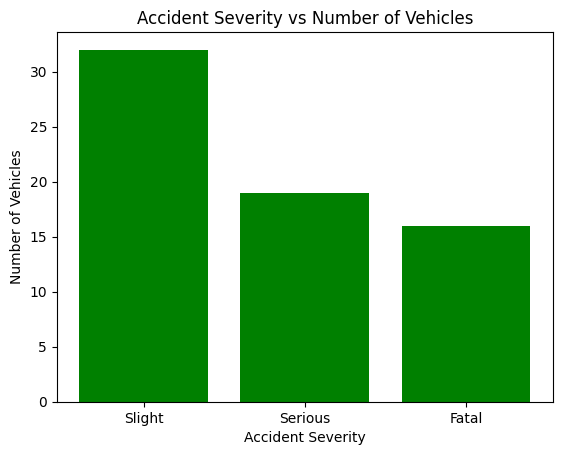

In [ ]:
#('Accident Severity vs Number of Vehicles')
plt.xlabel('Accident Severity')
plt.title('Accident Severity vs Number of Vehicles')
plt.ylabel('Number of Vehicles')
plt.subplot
plt.bar(df['Accident_Severity'], df['Number_of_Vehicles'],color = 'Green')
plt.show()

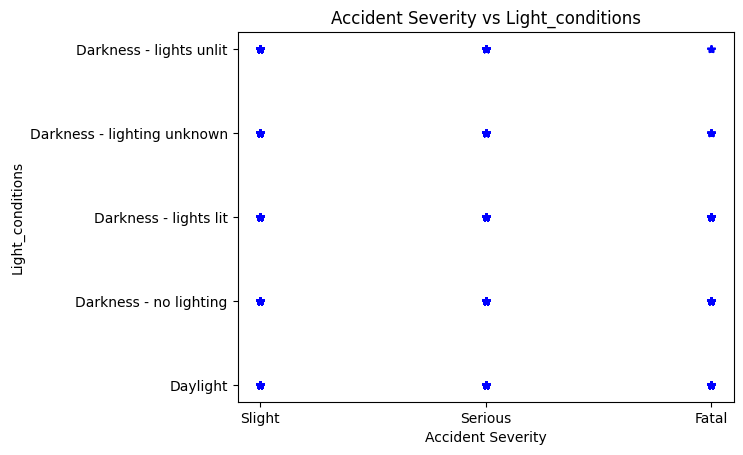

In [ ]:
plt.title('Accident Severity vs Light_conditions')
plt.xlabel('Accident Severity')
plt.ylabel('Light_conditions')
#plt.bar(df['Accident_Severity'],df['Light_Conditions'])
plt.plot(df['Accident_Severity'],df['Light_Conditions'],color = 'blue',marker = "*",ls="none")
plt.show()

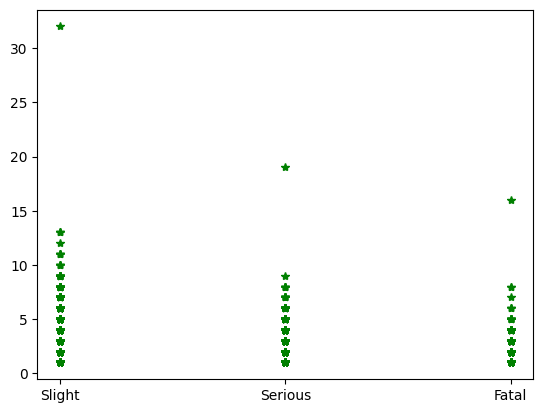

In [ ]:
plt.plot(data['Accident_Severity'], data['Number_of_Vehicles'],'green', marker='*', ls="None")

([<matplotlib.patches.Wedge at 0x7809fd894090>,
 [Text(-0.988233882382987, 0.48310846992186846, 'Slight'),
  Text(0.9676456241494733, -0.5231270840478213, 'Serious'),
  Text(1.0990793938184897, -0.04499428945522994, 'Fatal')])

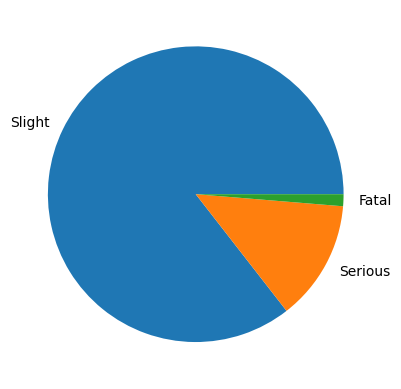

In [ ]:
plt.pie(data['Accident_Severity'].value_counts(), labels=data['Accident_Severity'].unique())

In [ ]:
print(df['Vehicle_Type'].unique())
condition =(df ['Vehicle_Type']== 'Van / Goods 3.5 tonnes mgw or under') |(df ['Vehicle_Type']=='Goods 7.5 tonnes mgw and over')|(df ['Vehicle_Type']=='Goods over 3.5t. and under 7.5t')
df.loc[condition,"Vehicle_Type"]='goods'
df.loc[condition,"Vehicle_Type"]
condition2 =(df ['Vehicle_Type']=='Motorcycle 125cc and under')|(df ['Vehicle_Type']=='Motorcycle over 125cc and up to 500cc')|(df ['Vehicle_Type']=='Motorcycle 50cc and under')|(df ['Vehicle_Type']=='Motorcycle over 125cc and up to 500cc')|(df ['Vehicle_Type']=='Motorcycle over 500cc')
df.loc[condition2,"Vehicle_Type"]='Motorcycle'
df.loc[condition2,"Vehicle_Type"]
condition3 = (df['Vehicle_Type']== 'Minibus (8 - 16 passenger seats)')|(df['Vehicle_Type']=='Bus or coach (17 or more pass seats)')
df.loc[condition3,'Vehicle_Type'] ='Bus'


['Car' 'Van / Goods 3.5 tonnes mgw or under' 'Motorcycle 125cc and under'
 'Bus or coach (17 or more pass seats)' 'Goods 7.5 tonnes mgw and over'
 'Taxi/Private hire car' 'Other vehicle' 'Motorcycle 50cc and under'
 'Motorcycle over 125cc and up to 500cc' 'Motorcycle over 500cc'
 'Goods over 3.5t. and under 7.5t' 'Minibus (8 - 16 passenger seats)'
 'Agricultural vehicle' 'Pedal cycle' 'Ridden horse']


([<matplotlib.patches.Wedge at 0x7809fd868350>,
 [Text(-0.845361800805257, 0.7038205920114111, 'Car'),
  Text(0.465812974857315, -0.9965030217990203, 'goods'),
  Text(0.8902231486344483, -0.6461445237989479, 'Motorcycle'),
  Text(1.0571282056977334, -0.3041051737775778, 'Bus'),
  Text(1.0914994626461476, -0.13648781280089065, 'Taxi/Private hire car'),
  Text(1.0990958187829278, -0.044591267462205264, 'Other vehicle'),
  Text(1.099963005359285, -0.009021465566612217, 'Agricultural vehicle'),
  Text(1.0999998139792369, -0.0006397231001314378, 'Pedal cycle'),
  Text(1.0999999994936254, -3.337700581637021e-05, 'Ridden horse')],
 [Text(-0.4611064368028674, 0.3839021410971333, '77.9%'),
  Text(0.25407980446762635, -0.5435471027994655, '8.1%'),
  Text(0.4855762628915172, -0.35244246752669883, '8.0%'),
  Text(0.5766153849260364, -0.1658755493332242, '3.1%'),
  Text(0.5953633432615351, -0.07444789789139489, '1.9%'),
  Text(0.5995068102452332, -0.02432250952483923, '0.8%'),
  Text(0.599979821105

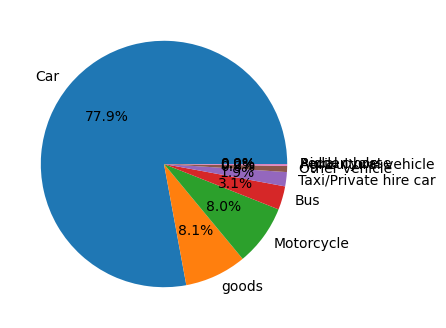

In [ ]:
x =df['Vehicle_Type'].value_counts()
plt.figure(figsize=(15,4))
plt.xticks(rotation=45, ha='right')
plt.pie(x,labels=df['Vehicle_Type'].unique(),autopct='%1.1f%%')

In [ ]:
df

,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,2021-06-26,Friday,Give way or uncontrolled,T or staggered junction,Slight,51.490333,Daylight,Southwark,-0.054992,2,2,Dry,Single carriageway,30,Urban,Fine no high winds,Car
1,2022-09-01,Wednesday,Give way or uncontrolled,Slip road,Slight,51.878849,Daylight,Colchester,0.780218,1,2,Dry,Dual carriageway,40,Rural,Fine no high winds,Car
2,2022-01-15,Friday,Data missing or out of range,Not at junction or within 20 metres,Slight,53.777127,Daylight,Leeds,-1.558689,1,1,Wet or damp,Single carriageway,30,Urban,Raining no high winds,goods
3,2022-01-06,Wednesday,Data missing or out of range,Not at junction or within 20 metres,Slight,52.306265,Darkness - no lighting,Huntingdonshire,-0.075312,1,3,Snow,Single carriageway,60,Rural,Snowing no high winds,Car
4,2022-11-15,Monday,Give way or uncontrolled,T or staggered junction,Slight,51.880617,Daylight,Colchester,0.911552,1,1,Dry,Single carriageway,30,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102652,2021-02-24,Tuesday,Auto traffic signal,Roundabout,Slight,52.601229,Daylight,Blaby,-1.194381,4,4,Dry,Slip road,70,Rural,Fine no high winds,Car
102653,2021-12-17,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.594849,Darkness - lights lit,Barnet,-0.250498,1,2,Wet or damp,Single carriageway,30,Urban,Raining no high winds,Car
102654,2021-03-04,Wednesday,Not at junction or within 20 metres,Not at junction or within 20 metres,Slight,51.714766,Darkness - lights lit,Stroud,-2.301763,2,1,Wet or damp,Single carriageway,30,Rural,Raining no high winds,Car
102655,2021-07-15,Wednesday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.441262,Daylight,Dartford,0.235759,1,2,Dry,Single carriageway,50,Urban,Fine no high winds,Car


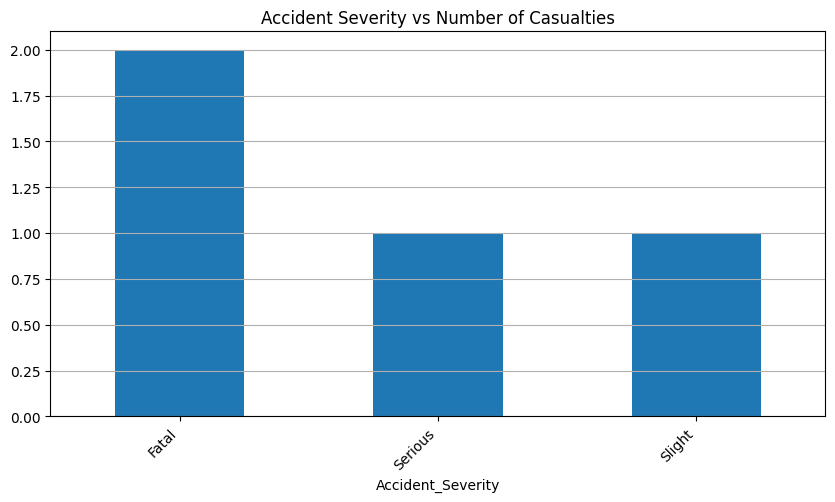

In [ ]:
grouped_by_severity = df.groupby('Accident_Severity')
average_vehicles_per_severity = grouped_by_severity['Number_of_Casualties'].mean()
plt.figure(figsize=(10, 5))
round(average_vehicles_per_severity).plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.title('Accident Severity vs Number of Casualties')
plt.show()

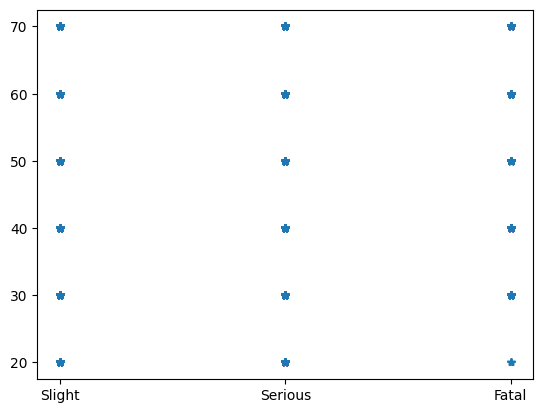

In [ ]:
plt.plot(df['Accident_Severity'],df['Speed_limit'],marker='*',ls="none")
#plt.plot(df['Number_of_Vehicles'],df['Speed_limit'],'green' ,linestyle='none',marker='*')

In [ ]:
df.sort_values('Number_of_Casualties',ascending=False)

,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
84799,2021-09-25,Friday,Data missing or out of range,Not at junction or within 20 metres,Serious,52.452081,Daylight,Waveney,1.596712,27,2,Dry,Single carriageway,30,Urban,Fine no high winds,Car
38903,2022-07-01,Thursday,Give way or uncontrolled,Roundabout,Slight,53.467581,Daylight,Sefton,-3.003541,24,4,Wet or damp,Dual carriageway,40,Urban,Raining no high winds,Car
22222,2021-03-13,Friday,Give way or uncontrolled,Roundabout,Fatal,51.689525,Daylight,Swansea,-3.889665,21,2,Dry,Single carriageway,60,Rural,Fine no high winds,goods
18406,2021-01-22,Thursday,Give way or uncontrolled,T or staggered junction,Slight,54.765338,Daylight,Durham,-1.520027,18,2,Wet or damp,Single carriageway,60,Rural,Fine no high winds,Car
45779,2021-12-07,Monday,Give way or uncontrolled,Mini-roundabout,Serious,54.804411,Daylight,County Durham,-1.588327,18,4,Wet or damp,Single carriageway,30,Urban,Fine no high winds,Motorcycle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38943,2022-09-26,Sunday,Auto traffic signal,More than 4 arms (not roundabout),Slight,50.464721,Daylight,Torbay,-3.542248,1,2,Dry,Single carriageway,30,Urban,Fine no high winds,goods
38942,2021-05-11,Monday,Give way or uncontrolled,T or staggered junction,Slight,50.837655,Daylight,Brighton and Hove,-0.124159,1,1,Dry,Single carriageway,30,Urban,Fine no high winds,Car
38941,2022-06-02,Wednesday,Give way or uncontrolled,T or staggered junction,Slight,52.040452,Daylight,Ipswich,1.185331,1,2,Dry,Single carriageway,30,Urban,Fine no high winds,Car
38940,2021-10-10,Saturday,Give way or uncontrolled,Slip road,Slight,51.690702,Daylight,Hertsmere,-0.226115,1,3,Wet or damp,Dual carriageway,70,Rural,Fine no high winds,Car


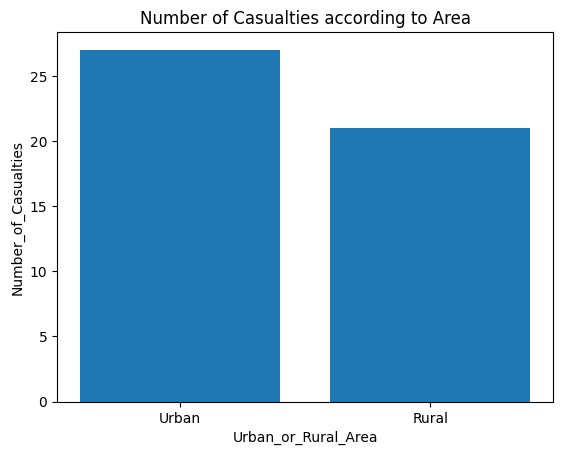

In [ ]:
plt.title('Number of Casualties according to Area')
plt.xlabel('Urban_or_Rural_Area')
plt.ylabel('Number_of_Casualties')
plt.bar(df['Urban_or_Rural_Area'],df['Number_of_Casualties'])
plt.show()

In [ ]:
print(df['Accident_Severity'].max())
print(df['Accident_Severity'].min())

Slight
Fatal


<ipython-input-54-3e84642d9185>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('magma', num_bars)


<BarContainer object of 102657 artists>

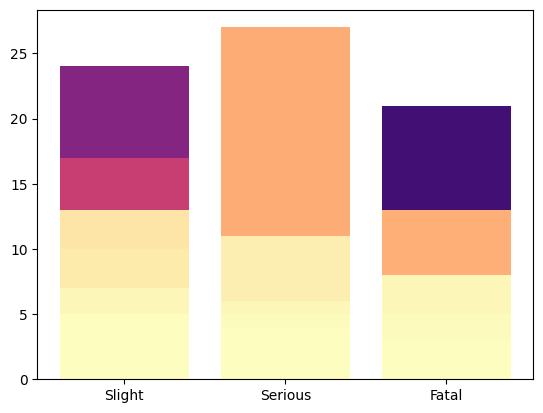

In [ ]:
#plt.plot(df['Number_of_Casualties'], df['Accident_Severity'], 'green', markersize=10, linestyle='--')
num_bars = len(df['Number_of_Casualties'])
cmap = plt.cm.get_cmap('magma', num_bars)
plt.bar(df['Accident_Severity'], df['Number_of_Casualties'],color=cmap(np.arange(num_bars)))

In [ ]:
df.columns

Index(['Accident Date', 'Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type',
       'Speed_limit', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

Data ready for plotting:
   Accident_Severity           Road_Type  Count
12            Slight  Single carriageway  65445
9             Slight    Dual carriageway  13095
7            Serious  Single carriageway  10789
11            Slight          Roundabout   6455
10            Slight      One way street   1805
4            Serious    Dual carriageway   1797
3              Fatal  Single carriageway   1032
13            Slight           Slip road    997
6            Serious          Roundabout    567
5            Serious      One way street    272
0              Fatal    Dual carriageway    261
8            Serious           Slip road     96
2              Fatal          Roundabout     29
1              Fatal      One way street     15


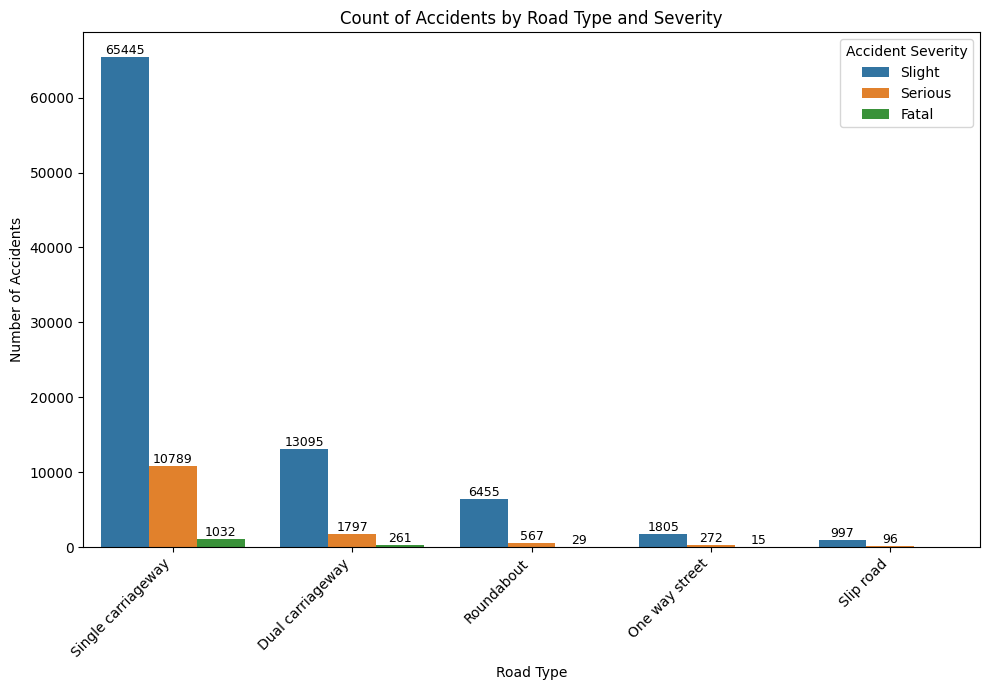

In [ ]:
#Accident_Severity(count) Road_Type
grouped_counts=data.groupby(['Accident_Severity','Road_Type'])['Road_Type'].count()
df_withIndex = grouped_counts.reset_index(name='Count').sort_values(by='Count', ascending=False)


print("Data ready for plotting:")
print(df_withIndex)

# --- Create the chart ---

# Use seaborn's barplot or catplot
plt.figure(figsize=(10, 7)) # Adjust figure size as needed

ax=sns.barplot(df_withIndex,
            x='Road_Type',         # X-axis: Road Types
            y='Count',             # Y-axis: The counts
            hue='Accident_Severity') # Group bars by Accident Severity
for patch in ax.patches:
    # Get the height of the bar
    height = patch.get_height()
    if height > 0:
      # Add the text label
      ax.text(patch.get_x() + patch.get_width() / 2., # X position: center of the bar
              height, # Y position: top of the bar
              f'{int(height)}', # The text to display (the count, formatted as int)
              ha='center', # Horizontal alignment: center
              va='bottom', # Vertical alignment: position text below the top of the bar
              fontsize=9) # Optional: adjust font size


plt.title('Count of Accidents by Road Type and Severity')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right') # Rotate labels if they overlap
plt.legend(title='Accident Severity')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

<ipython-input-75-8991621b65a0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df , x = 'Vehicle_Type',palette = 'Accent')


Text(0.5, 1.0, 'Accidents by Vehicle Type')

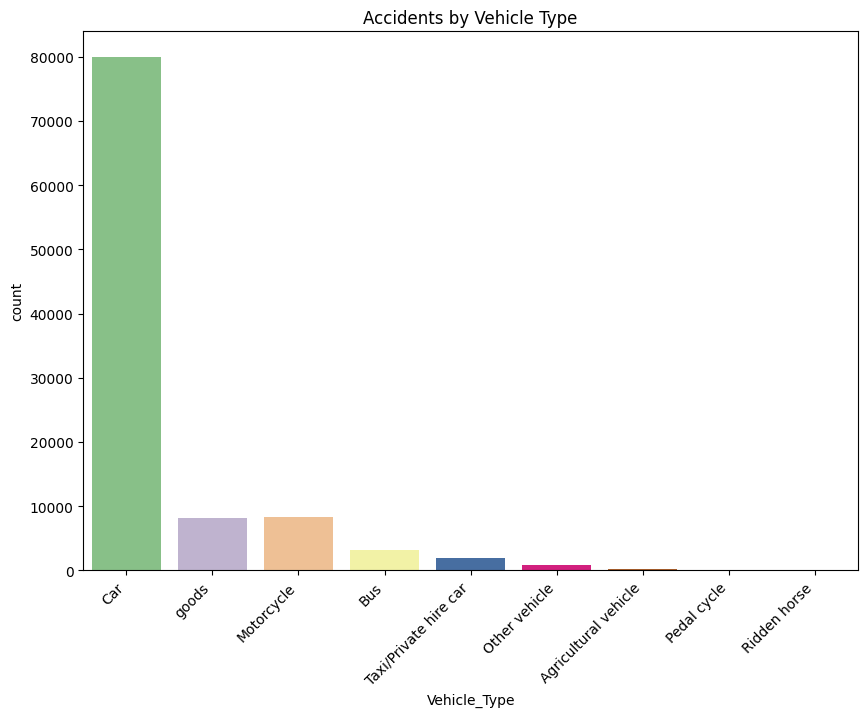

In [ ]:
# Vehicle_Type no of Vehicle_Type(categorized)
#df.groupby('Vehicle_Type').sum()
plt.figure(figsize=(10, 7))
plt.xticks(rotation=45, ha='right')
sns.countplot(data=df , x = 'Vehicle_Type',palette = 'Accent')

plt.title('Accidents by Vehicle Type')


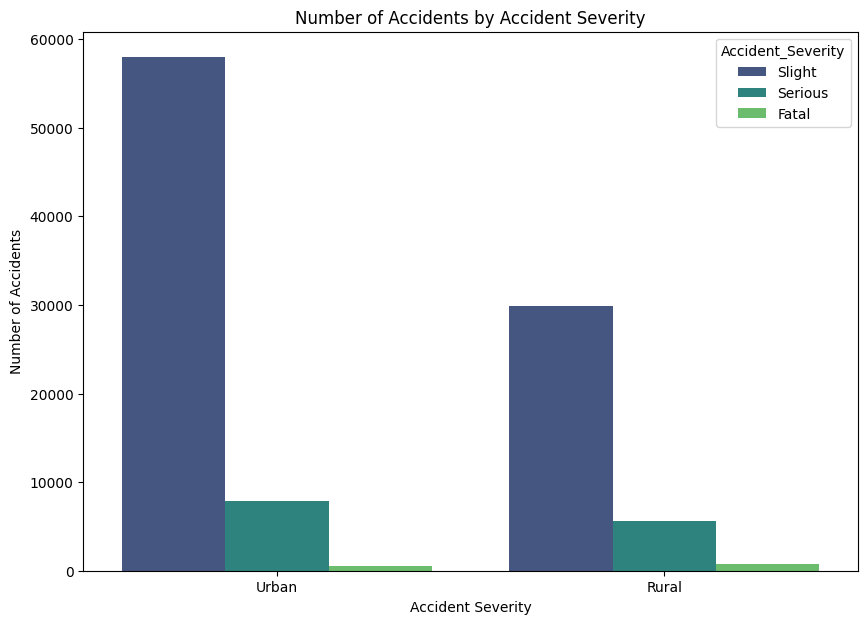

In [ ]:
# no of Accident_Severity (catgorized) Urban_or_Rural_Area
plt.figure(figsize=(10, 7))
sns.countplot(data=df,
              x='Urban_or_Rural_Area',
              hue='Accident_Severity',
              palette='viridis')
plt.title('Accident Severity vs Urban_or_Rural_Area')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Accident Severity')
plt.show()

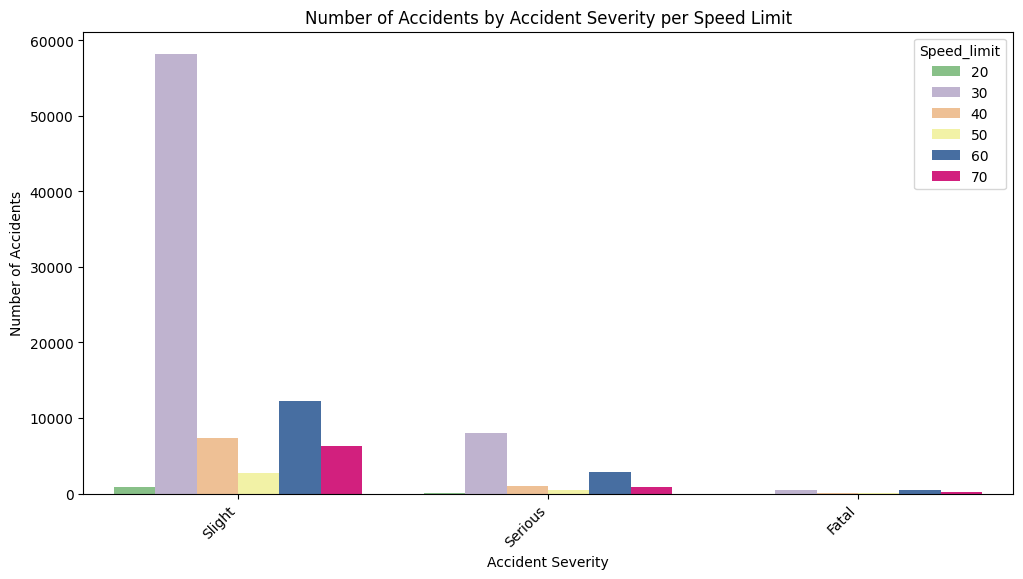

In [ ]:
#Speed_limit(count) Accident Severity

plt.figure(figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
sns.countplot(data=df, x='Accident_Severity', hue='Speed_limit', palette='Accent' )
plt.title('Number of Accidents by Accident Severity per Speed Limit')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.show()

In [ ]:
df.head()

,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,2021-06-26,Friday,Give way or uncontrolled,T or staggered junction,Slight,51.490333,Daylight,Southwark,-0.054992,2,2,Dry,Single carriageway,30,Urban,Fine no high winds,Car
1,2022-09-01,Wednesday,Give way or uncontrolled,Slip road,Slight,51.878849,Daylight,Colchester,0.780218,1,2,Dry,Dual carriageway,40,Rural,Fine no high winds,Car
2,2022-01-15,Friday,Data missing or out of range,Not at junction or within 20 metres,Slight,53.777127,Daylight,Leeds,-1.558689,1,1,Wet or damp,Single carriageway,30,Urban,Raining no high winds,goods
3,2022-01-06,Wednesday,Data missing or out of range,Not at junction or within 20 metres,Slight,52.306265,Darkness - no lighting,Huntingdonshire,-0.075312,1,3,Snow,Single carriageway,60,Rural,Snowing no high winds,Car
4,2022-11-15,Monday,Give way or uncontrolled,T or staggered junction,Slight,51.880617,Daylight,Colchester,0.911552,1,1,Dry,Single carriageway,30,Urban,Fine no high winds,Car


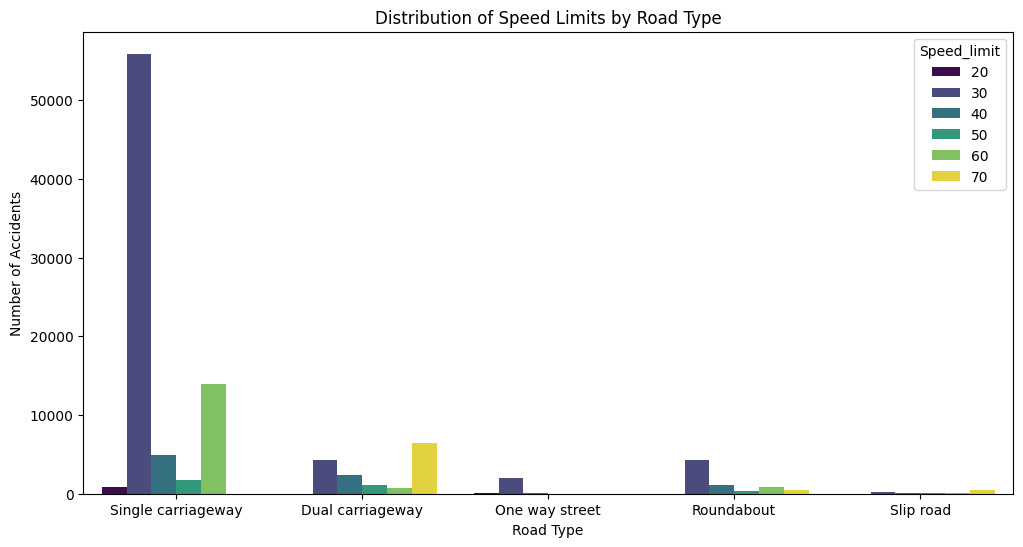

In [ ]:
#Speed_limit(count) Road_Type

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Road_Type', hue='Speed_limit', palette='viridis')
plt.title("Distribution of Speed Limits by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.show()

<Axes: xlabel='Accident_Severity', ylabel='proportion'>

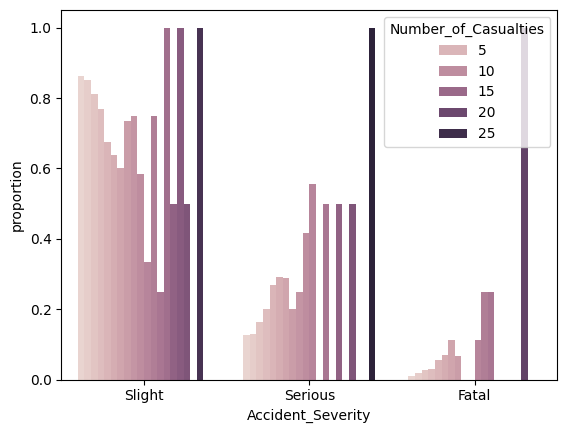

In [ ]:
# Number_of_Casualties 	Accident_Severity (proportion)
x, y, hue = "Accident_Severity", "proportion", "Number_of_Casualties"
#hue_order = ["Fatal", "Serious","Slight"]

(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .reset_index()
.pipe((sns.barplot, "data"), x=x, y=y, hue=hue)
   )


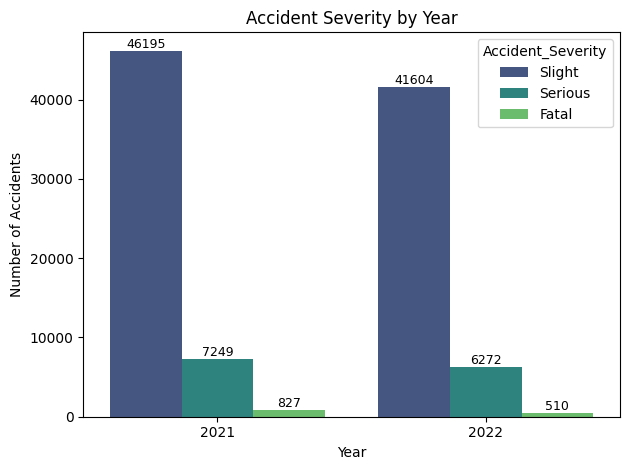

In [ ]:
#Accident Date(years)	 Accident_Severity(categorized)

df['Accident Date'] = pd.to_datetime(df['Accident Date'])
df['Year'] = df['Accident Date'].dt.year
df['Month'] =df['Accident Date'].dt.month
df['quarter'] ='Q'+df['Accident Date'].dt.quarter.astype(str)

ax=sns.countplot(data=df, x='Year', hue='Accident_Severity', palette='viridis')
plt.title('Accident Severity by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')


for patch in ax.patches:
    # Get the height of the bar
    height = patch.get_height()
    # Only add text if the bar height is greater than 0
    if height > 0:
        # Add the text label
        ax.text(patch.get_x() + patch.get_width() / 2., # X position: center of the bar
                height, # Y position: top of the bar
                f'{int(height)}', # The text to display (the count, formatted as int)
                ha='center', # Horizontal alignment: center
                va='bottom', # Vertical alignment: position text below the top of the bar
                fontsize=9) # Optional: adjust font size


plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


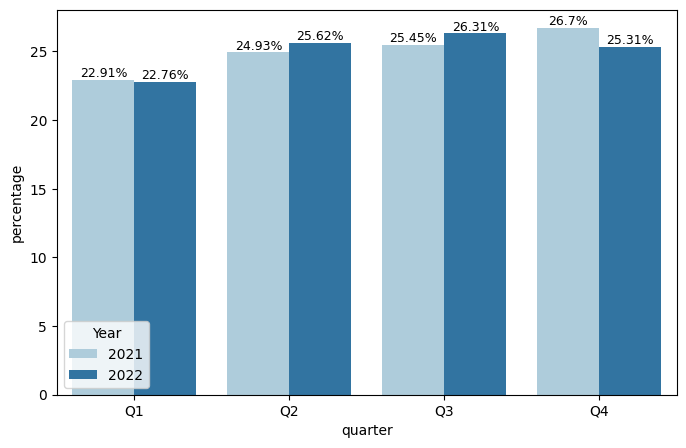

In [ ]:
#Accident Date	Number_of_Casualties(every quarter % casualities)
df['quarter']
df['Number_of_Casualties']
dff=df.groupby(['Year','quarter'])['Number_of_Casualties'].sum().reset_index()
total21=dff.loc[dff['Year']==2021,'Number_of_Casualties'].sum()
total22=dff.loc[dff['Year']==2022,'Number_of_Casualties'].sum()
dff.loc[dff['Year']==2021,'percentage']=(dff['Number_of_Casualties']/total21)*100
dff.loc[dff['Year']==2022,'percentage']=(dff['Number_of_Casualties']/total22)*100
dff
plt.figure(figsize=(8, 5))
ax=sns.barplot(data=dff,x='quarter',y='percentage',hue='Year',palette='Paired')
for patch in ax.patches:
    height = patch.get_height()
    # Only add text if the bar height is greater than 0
    if height > 0:
        # Add the text label
        ax.text(patch.get_x() + patch.get_width()/2., # X position: center of the bar
                height, # Y position: top of the bar
                f'{round(float(height),2)}%', # The text to display (the count, formatted as int)
                ha='center', # Horizontal alignment: center
                va='bottom', # Vertical alignment: position text below the top of the bar
                fontsize=9) # Optional: adjust font size


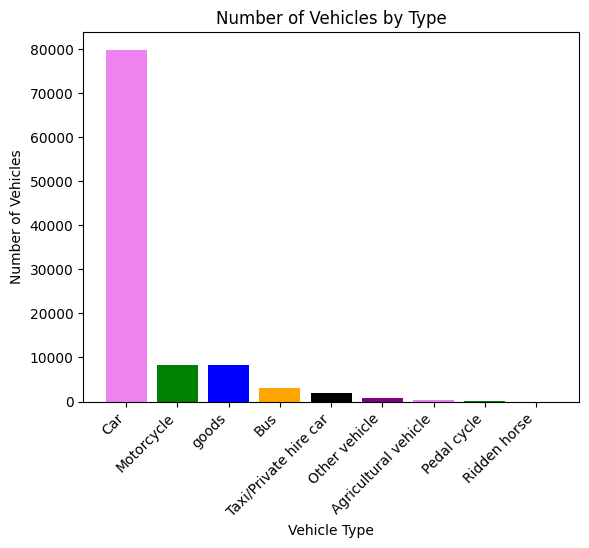

In [ ]:
# Vehicle_Type no of Vehicle_Type(categorized)
Vehicle_number_counts = df['Vehicle_Type'].value_counts()
colors = ['violet', 'green', 'blue', 'orange','black','purple']
plt.bar(Vehicle_number_counts.index, Vehicle_number_counts.values,color=colors)
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Vehicles")
plt.title("Number of Vehicles by Type")
plt.xticks(rotation=45, ha='right')
plt.show()

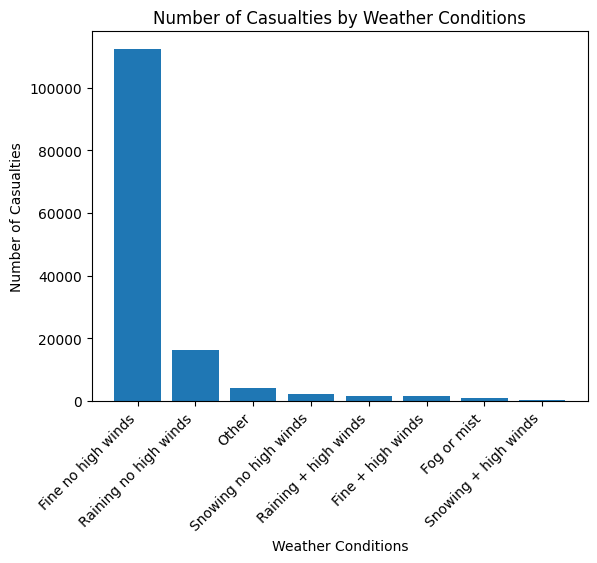

In [ ]:
#Number_of_Casualties(sum) Weather_Conditions(group)

df['Weather_Conditions'].unique()
Weather_casualties = df.groupby('Weather_Conditions')['Number_of_Casualties'].sum()
Weather_casualties_sum = Weather_casualties.sort_values(ascending=False)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.bar(Weather_casualties_sum.index, Weather_casualties_sum.values)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Casualties')
plt.title('Number of Casualties by Weather Conditions')
plt.show()